<a href="https://colab.research.google.com/github/Mubashirr101/Loan-Approval-Prediction-Model/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Loan Approval Prediction

## Introduction

This project aims to predict loan approvals based on applicant details such as income, education, and credit history.  
Using machine learning techniques, we preprocess data, handle missing values, and train predictive models to evaluate performance.

### Objectives:
1. Explore and preprocess the dataset.
2. Analyze trends and patterns in applicant data.
3. Train machine learning models for classification.
4. Evaluate model performance and accuracy.

We begin with importing the csv file and creating a dataset.

## importing modules & reading csv

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/loan_approval_dataset.csv")
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Cleaning


**Overview**:

Data cleaning is crucial for preparing the dataset for analysis.  
Here, we handle missing values, check data types, perform label encoding on necesssary features & standardize data formats.


### Handling Null Values

In [22]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


### Checking datatypes

In [23]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [25]:
# Dropping the ID col since its of no use
df.drop(columns=['loan_id'], inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [26]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [27]:
# Editing the col names (removing the extra spaces present)
df.columns=df.columns.str.strip()
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


## Label Encoding

In [28]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


*Here we can see that **education**, **self_employed**, **loan_status** are categorical*

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [30]:
df.dtypes

,0
no_of_dependents,int64
education,int64
self_employed,int64
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


Finally all the features are now numeric

## Standardization

In [31]:
# Lets standardize all the data to make it more balanced for training the models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Feature columns
x = df.drop(columns=['loan_status'])
# Target Column
y = df['loan_status']

# standardize the feature cols (only numerics)
numerical_cols = ['no_of_dependents','income_annum','loan_amount','loan_term',
                  'cibil_score','residential_assets_value','commercial_assets_value',
                  'luxury_assets_value','bank_asset_value']
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])
print(x.head())
print(y.head())


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0         -0.294102          0              0      1.617979     1.633052   
1         -1.473548          1              1     -0.341750    -0.324414   
2          0.295621          0              0      1.439822     1.610933   
3          0.295621          0              0      1.119139     1.721525   
4          1.475067          1              1      1.689242     1.002681   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0   0.192617     1.032792                 -0.780058                 2.877289   
1  -0.508091    -1.061051                 -0.733924                -0.631921   
2   1.594031    -0.544840                 -0.057300                -0.107818   
3  -0.508091    -0.771045                  1.649637                -0.381263   
4   1.594031    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_asset_value  
0             0.832

## Model Training

Several machine learning algorithms are employed to predict loan approvals.  
We split the data into training and testing sets, train the models, and evaluate performance using metrics such as accuracy, precision, recall, and F1-score.

In [32]:
# We will try 6 different ML algos
# LogReg,DT,RF,SVM,KNN,XGB
# But first we will split the training n testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

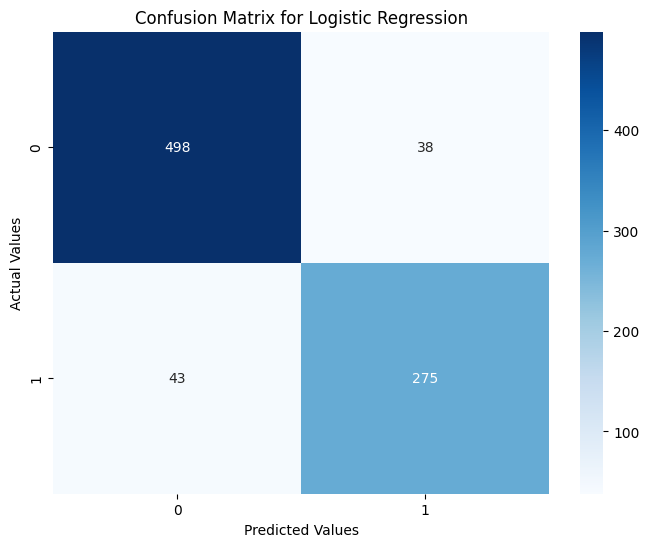


Logistic Regression Evaluation Metrics
Accuracy:  0.905152224824356
Precision:  0.9049067721845864
Recall:  0.905152224824356
F1 Score:  0.9049966078550483

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
logistic_req= LogisticRegression(random_state=42)
logistic_req.fit(x_train,y_train)
y_pred = logistic_req.predict(x_test)

# check evaluation metrics
lr_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# print all the evaluation metrics
print("\nLogistic Regression Evaluation Metrics")
print("Accuracy: ",lr_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

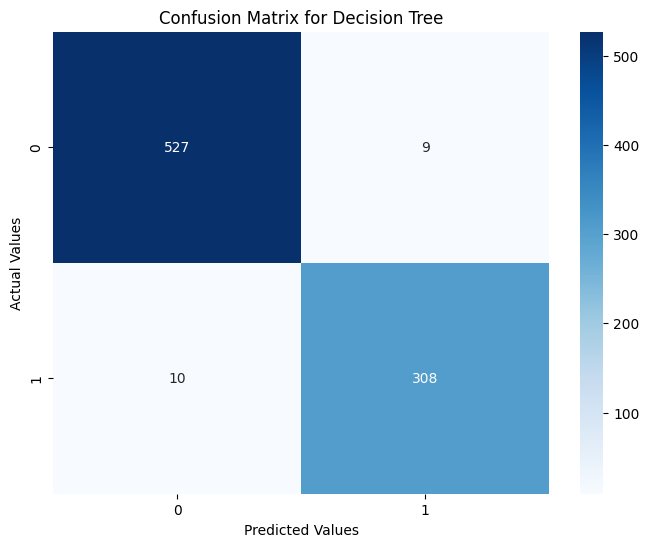


Decision Tree Evaluation Metrics
Accuracy:  0.977751756440281
Precision:  0.9777403171039073
Recall:  0.977751756440281
F1 Score:  0.9777446054465413

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
des_tree= DecisionTreeClassifier(random_state=42)
des_tree.fit(x_train,y_train)
y_pred = des_tree.predict(x_test)

# check evaluation metrics
dt_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# print all the evaluation metrics
print("\nDecision Tree Evaluation Metrics")
print("Accuracy: ",dt_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

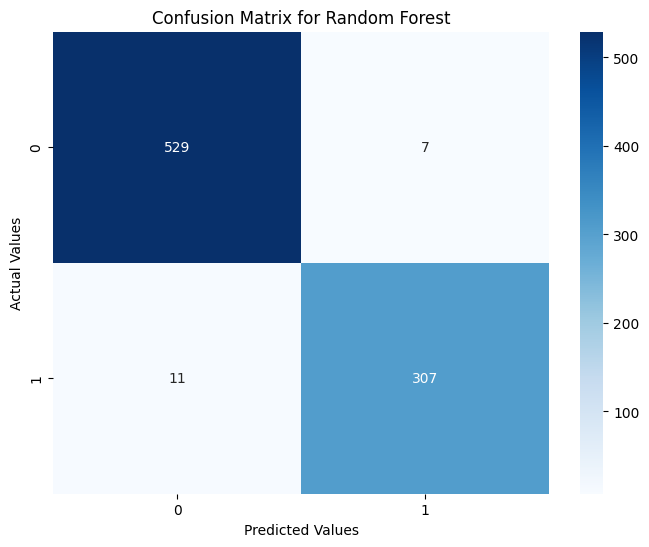


Random Forest Evaluation Metrics
Accuracy:  0.9789227166276346
Precision:  0.9789137113664627
Recall:  0.9789227166276346
F1 Score:  0.9788951934704381

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)

# check evaluation metrics
rf_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# print all the evaluation metrics
print("\nRandom Forest Evaluation Metrics")
print("Accuracy: ",rf_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

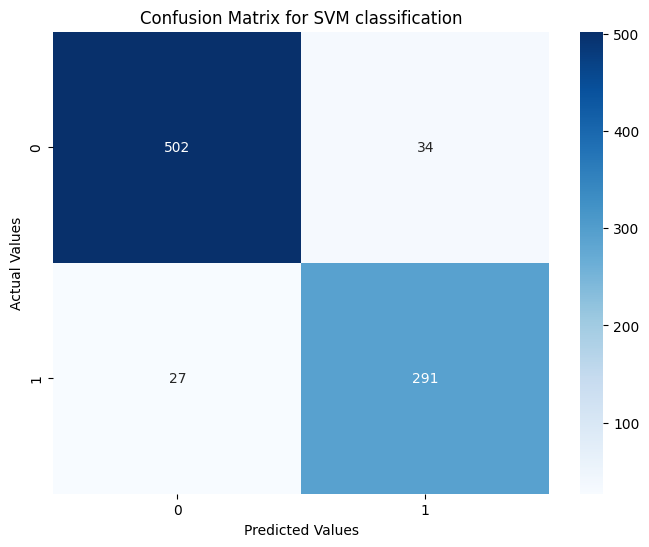


SVMC Evaluation Metrics
Accuracy:  0.9285714285714286
Precision:  0.9290105735474354
Recall:  0.9285714285714286
F1 Score:  0.9287254892757268

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       536
           1       0.90      0.92      0.91       318

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.92       854
weighted avg       0.93      0.93      0.93       854



In [36]:
# Simple Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
svm_classifier = SVC(random_state=42)
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)

# check evaluation metrics
svm_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for SVM classification')
plt.show()

# print all the evaluation metrics
print("\nSVMC Evaluation Metrics")
print("Accuracy: ",svm_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

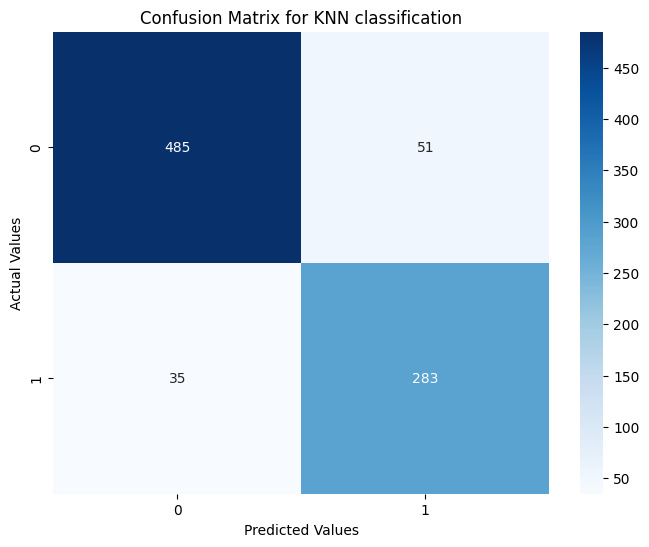


K-Nearest Neighbours Evaluation Metrics
Accuracy:  0.8992974238875878
Precision:  0.9008971788003887
Recall:  0.8992974238875878
F1 Score:  0.899770140014533

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       536
           1       0.85      0.89      0.87       318

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.89       854
weighted avg       0.90      0.90      0.90       854



In [37]:
# KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(x_train,y_train)
y_pred = KNN_classifier.predict(x_test)

# check evaluation metrics
knn_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for KNN classification')
plt.show()

# print all the evaluation metrics
print("\nK-Nearest Neighbours Evaluation Metrics")
print("Accuracy: ",knn_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

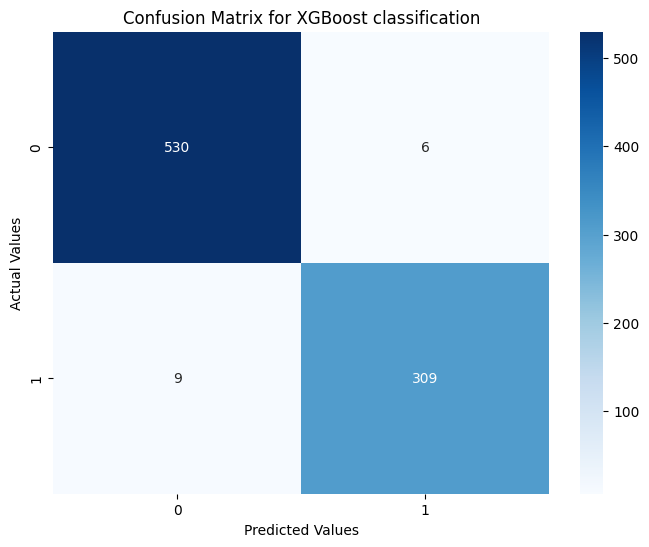


XGBoost Evaluation Metrics
Accuracy:  0.9824355971896955
Precision:  0.9824273418117514
Recall:  0.9824355971896955
F1 Score:  0.982418483851126

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [38]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instance , fit the model and predict
XGB_classifier = XGBClassifier(random_state=42)
XGB_classifier.fit(x_train,y_train)
y_pred = XGB_classifier.predict(x_test)

# check evaluation metrics
XGB_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for XGBoost classification')
plt.show()

# print all the evaluation metrics
print("\nXGBoost Evaluation Metrics")
print("Accuracy: ",XGB_accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

## Ensemble Training

In [39]:
# Comparing and Deciding which models to be used for ensemblde model training
print("Accuracy COMPARISON")
print("LogReg: ",lr_accuracy)
print("DT: ",dt_accuracy)
print("RF: ",rf_accuracy)
print("SVM: ",svm_accuracy)
print("KNN: ",knn_accuracy)
print("XGB: ",XGB_accuracy)

Accuracy COMPARISON
LogReg:  0.905152224824356
DT:  0.977751756440281
RF:  0.9789227166276346
SVM:  0.9285714285714286
KNN:  0.8992974238875878
XGB:  0.9824355971896955


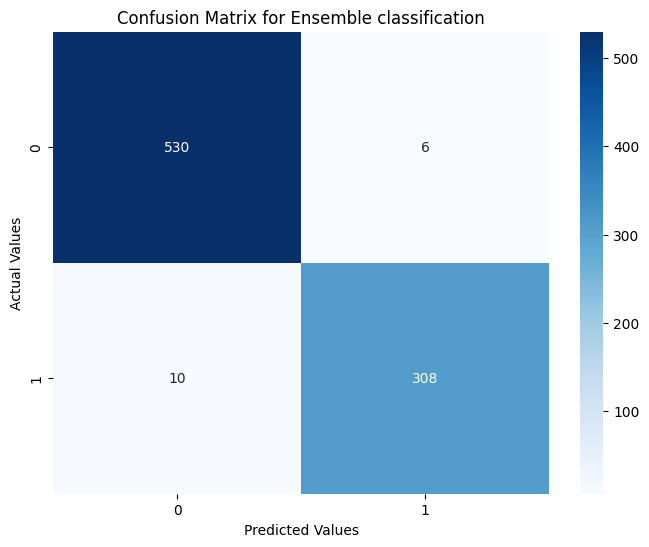


Ensemble classification Evaluation Metrics
Accuracy:  0.9812646370023419
Precision:  0.9812618746522892
Recall:  0.9812646370023419
F1 Score:  0.9812401719737228

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [40]:
# Creating an ensemble model to combine the top 3 most accurate model above
# i.e. Decision tree(.97) , Random Forest(.97) , XGBoost(.98)
#!pip install scikit-learn==1.3.0  # Install version 1.3.0
#!pip install --upgrade xgboost
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#create instances of all the 3 models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

#creating an ensemble of classifiers using voting classifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('decision_tree',decision_tree),
        ('random_forest',random_forest),
        ('xgb_classifier',xgb_classifier)
    ],voting="hard"
)



ensemble_classifier.fit(x_train,y_train)
y_pred = ensemble_classifier.predict(x_test)


# check evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

# classifcation report
classification_rep = classification_report(y_test,y_pred)

# confusion matrix
conf_met = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_met,annot=True,cmap='Blues',fmt='d') #fmt=d gives displayed numbers as int
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Ensemble classification')
plt.show()

# print all the evaluation metrics
print("\nEnsemble classification Evaluation Metrics")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
#print classification report
print("\nClassification Report: \n",classification_rep)

## Conclusion

In this project, we explored the loan dataset, handled missing values, and performed exploratory data analysis.  
We trained machine learning models to predict loan approvals and evaluated their performance.

### Findings:
We find that the XGBoost Classifier model performs most accurately with 98.24% accuracy which is closely followed by the ensemble model , performing at 98.12% accuracy.

### Key Takeaways:
- Data preprocessing significantly improves model performance.
- Feature selection and parameter tuning enhance predictive accuracy.
- This project demonstrates the practical application of machine learning in finance.

### Future Scope:
Further improvements can include advanced algorithms, feature engineering, and more advanced ensemble methods for higher accuracy.
